In [1]:
import os
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data'
image_dir = os.path.join(data_dir, 'images')
annotation_dir = os.path.join(data_dir, 'annotation')

train_image_dir = os.path.join(image_dir, 'train')
test_image_dir = os.path.join(image_dir, 'test')

train_annotation_dir = os.path.join(annotation_dir, 'train')
test_annotation_dir = os.path.join(annotation_dir, 'test')

In [3]:
def load_data(image_dir, annotation_dir):
    images = []
    labels = []
    class_map = {}
    class_index = 0

    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(image_dir, filename)
            annotation_path = os.path.join(annotation_dir, filename.replace('.jpg', '.json').replace('.png', '.json'))
            
            image = load_img(image_path, target_size=(224, 224))
            image = img_to_array(image) / 255.0
            images.append(image)
            
            with open(annotation_path, 'r') as f:
                annotation = json.load(f)
                label = annotation['class']
                
                if label not in class_map:
                    class_map[label] = class_index
                    class_index += 1
                
                labels.append(class_map[label])
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels, class_map

In [4]:
train_images, train_labels, class_map = load_data(train_image_dir, train_annotation_dir)
test_images, test_labels, _ = load_data(test_image_dir, test_annotation_dir)

num_classes = len(class_map)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
train_labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [7]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels))

Epoch 1/10
121/121 [==============================] - 36s 294ms/step - loss: 0.9850 - accuracy: 0.6125 - val_loss: 0.5963 - val_accuracy: 0.7464
Epoch 2/10
121/121 [==============================] - 39s 319ms/step - loss: 0.4984 - accuracy: 0.7976 - val_loss: 0.5220 - val_accuracy: 0.7930
Epoch 3/10
121/121 [==============================] - 35s 292ms/step - loss: 0.3467 - accuracy: 0.8695 - val_loss: 0.5317 - val_accuracy: 0.7878
Epoch 4/10
121/121 [==============================] - 36s 294ms/step - loss: 0.2307 - accuracy: 0.9151 - val_loss: 0.5419 - val_accuracy: 0.7992
Epoch 5/10
121/121 [==============================] - 35s 289ms/step - loss: 0.1520 - accuracy: 0.9500 - val_loss: 0.6194 - val_accuracy: 0.7971
Epoch 6/10
121/121 [==============================] - 35s 289ms/step - loss: 0.1216 - accuracy: 0.9588 - val_loss: 0.6420 - val_accuracy: 0.8033
Epoch 7/10
121/121 [==============================] - 35s 291ms/step - loss: 0.0922 - accuracy: 0.9713 - val_loss: 0.7405 - val_ac

In [8]:
model.save('Weapon-model-v1-1-1.keras')

26/26 [==============================] - 2s 63ms/step - loss: 1.2041 - accuracy: 0.7150
Test Accuracy: 0.71


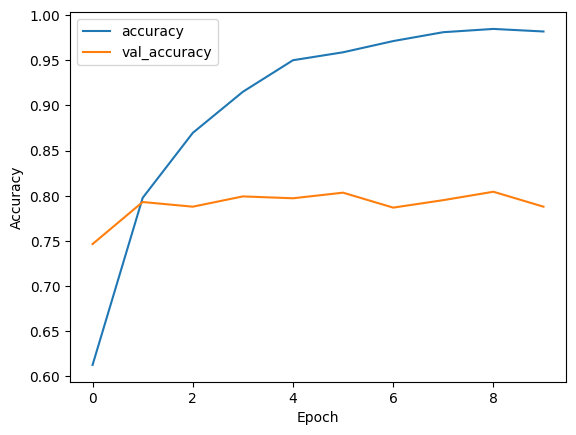

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy:.2f}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()